In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# In[2]:


from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
# kmodes kütüphanesi standart distribution içinde gelmez sizin install etmeniz gerekebilir.
# Massachusetts Institute of Technology (MIT) tarafından geliştirilmiş ileri seviye bir kütüphanedir.
# https://anaconda.org/conda-forge/kmodes linkinde detay mevcuttur
# conda install -c conda-forge kmodes   komutu ile Anaconda üzerinde kurabilirsiniz..
from kmodes.kprototypes import KPrototypes  
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv("segmentation_data.csv") 
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [5]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df_temp = df[['ID','Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [7]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [8]:
df = df.drop(['ID'], axis=1)

In [9]:
mark_array= df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

Bu kod parçası, K-Prototypes kümeleme algoritmasını kullanarak mark_array adlı bir veri setinde 10 küme oluşturur.

KPrototypes sınıfı, hem kategorik hem de sayısal verileri içeren veri setleri için kullanılabilen bir kümeleme algoritmasıdır. Bu örnekte, categorical parametresi kullanılarak 0, 1, 3, 5 ve 6 sütunlarının kategorik olduğu belirtilir. Diğer sütunlar ise sayısal değerlerdir.

fit_predict() yöntemi, veri setindeki her bir örnek için küme etiketi (0'dan 9'a kadar olan sayılar) döndürür ve bu etiketler clusters değişkenine atanır.

verbose parametresi, algoritmanın ilerlemesini gösteren çıktıları (log'ları) gösterir. Bu örnekte, verbose=2 olarak ayarlandığı için, her iterasyonda küme merkezlerinin konumunu ve kaydedilen çıktı değerlerini yazdırır.

max_iter parametresi, algoritmanın maksimum iterasyon sayısını belirtir. Bu örnekte, max_iter=20 olarak ayarlandığı için, algoritma en fazla 20 iterasyon yapar ve bu iterasyonlarda küme merkezlerini günceller.

Sonuç olarak, clusters değişkeninde her bir örnek için atanan küme etiketleri bulunur ve bu etiketlerin kullanılmasıyla veri seti 10 farklı küme olarak ayrılır.

In [10]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])


print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 774, ncost: 182.65006395074013
Run: 1, iteration: 2/20, moves: 129, ncost: 181.7977606749979
Run: 1, iteration: 3/20, moves: 65, ncost: 181.59038107140435
Run: 1, iteration: 4/20, moves: 30, ncost: 181.5174220456146
Run: 1, iteration: 5/20, moves: 118, ncost: 175.48304890101818
Run: 1, iteration: 6/20, moves: 99, ncost: 174.5624712480571
Run: 1, iteration: 7/20, moves: 80, ncost: 173.86079787743572
Run: 1, iteration: 8/20, moves: 49, ncost: 173.58617444625634
Run: 1, iteration: 9/20, moves: 19, ncost: 173.56313718202696
Run: 1, iteration: 10/20, moves: 3, ncost: 173.56252079180786
Run: 1, iteration: 11/20, moves: 0, ncost: 173.56252079180786
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 832, ncost: 172.48238394455868
Run: 2, iteration: 

10

In [11]:
clusters.T

array([0, 8, 7, ..., 5, 1, 5], dtype=uint16)

In [12]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)



df['cluster']=cluster_dict



# Put original columns from temp to df:
df[['ID','Age', 'Income']] = df_temp

In [13]:
df["cluster"].head()

0    0
1    8
2    7
3    0
4    0
Name: cluster, dtype: uint16

In [14]:
ort = df[df["cluster"]== 2 ]
ortalamaincome = ort["Income"].mean()
ortyas = ort["Age"].mean()
ortalamaincome


164007.76666666666

In [18]:
round(ortyas)

55

In [16]:
df["cluster"].unique()

array([0, 8, 7, 3, 4, 6, 9, 1, 5, 2], dtype=uint16)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


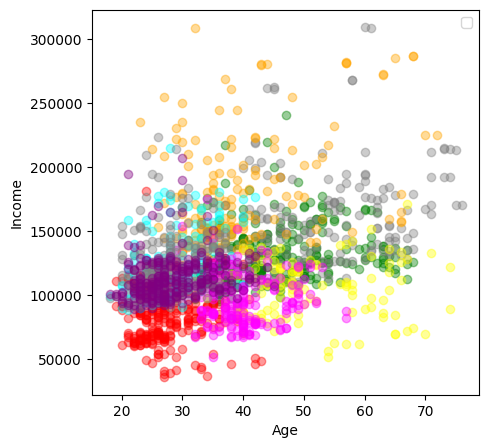

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]


plt.figure(figsize=(5,5))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)


# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
#plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()